<a href="https://colab.research.google.com/github/bhatabhijithn/EIP4/blob/master/1st_DNN_9923.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


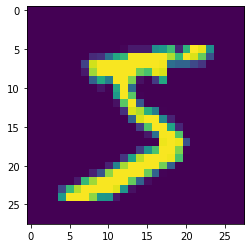

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(32, 7,7, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)          2890      
____

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
from keras.optimizers import Adam
'''
beta_1 = 0.9
beta_2 = 0.999
epsilon = 10 ** (-8)
lr=0.01
optimizer = Adam(lr=lr, beta_1=beta_1)#, beta_2=beta_2, epsilon=epsilon, clipnorm=1.
'''
model.compile(loss='categorical_crossentropy',
             optimizer= Adam(),
             metrics=['accuracy'], )
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test)) #64-98.9

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 60s 994us/step - loss: 0.2003 - acc: 0.9391 - val_loss: 0.0676 - val_acc: 0.9792
Epoch 2/20
60000/60000 [==============================] - 60s 996us/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.0387 - val_acc: 0.9862
Epoch 3/20
60000/60000 [==============================] - 59s 987us/step - loss: 0.0489 - acc: 0.9849 - val_loss: 0.0332 - val_acc: 0.9898
Epoch 4/20
60000/60000 [==============================] - 58s 964us/step - loss: 0.0426 - acc: 0.9863 - val_loss: 0.0345 - val_acc: 0.9893
Epoch 5/20
60000/60000 [==============================] - 59s 975us/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0267 - val_acc: 0.9916
Epoch 6/20
60000/60000 [==============================] - 59s 979us/step - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0363 - val_acc: 0.9887
Epoch 7/20
60000/60000 [==============================] - 60s 992us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0305511621700477, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.27365307e-15 6.62965369e-14 2.03705519e-09 1.91203615e-11
  1.46941985e-17 3.66295345e-18 2.63377326e-24 1.00000000e+00
  3.53666511e-14 2.56653845e-08]
 [6.85834549e-12 9.53153702e-12 1.00000000e+00 2.23923576e-20
  1.50500166e-16 2.75255942e-23 3.38426552e-12 1.65154696e-16
  5.12689229e-13 5.35959965e-17]
 [2.68483829e-11 9.99854088e-01 3.24515748e-10 1.29629875e-11
  8.92541357e-06 1.52464239e-07 1.90733290e-10 1.36807270e-04
  2.81812707e-08 1.03912390e-09]
 [9.99999881e-01 3.49791985e-19 3.92946065e-10 2.34043118e-13
  2.34733955e-12 5.27013055e-09 1.46433425e-08 1.22626952e-13
  3.73578715e-08 2.55223487e-08]
 [2.32890117e-18 3.14210747e-15 2.34036762e-14 2.50169340e-18
  1.00000000e+00 2.13957833e-15 1.37677239e-12 5.44683710e-13
  9.66102632e-13 3.90591239e-08]
 [1.19541347e-11 9.99977469e-01 8.06423678e-11 6.42345267e-14
  1.91326194e-06 8.98201180e-10 1.01280435e-10 2.06715085e-05
  2.77453754e-10 4.19952711e-10]
 [1.03426050e-25 1.55098756e-09 9.97339451e-12 2.42104547e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored